<a href="https://colab.research.google.com/github/HugoMagos0725/Analisis_de_datos/blob/main/Proyecto1_Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FCFM-BUAP, 2023**

## Proyecto: Estadistica Descriptiva

Nombre: Hugo Cuautle Magos

Matricula: 201847053 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_excel('/content/drive/MyDrive/capturas_2015-2020.xlsx',sheet_name=None)
df

{'2015':             Fecha   Latitud  Longitud                  Ubicacion Municipio  \
 0      2015-01-22  24.11564 -99.03734  177_THUE05-28-030-0415T01   PADILLA   
 1      2015-01-29  24.11564 -99.03734  177_THUE05-28-030-0415T01   PADILLA   
 2      2015-01-29  24.11562 -99.03560  177_THUE05-28-030-0415T02   PADILLA   
 3      2015-01-22  24.11562 -99.03560  177_THUE05-28-030-0415T02   PADILLA   
 4      2015-01-29  24.11726 -99.03528  177_THUE05-28-030-0415T03   PADILLA   
 ...           ...       ...       ...                        ...       ...   
 421355 2015-12-25  24.05003 -98.88733  177_THUE05-28-030-0700T17   PADILLA   
 421356 2015-12-18  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 421357 2015-12-25  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 421358 2015-12-11  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 421359 2015-12-04  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 
                  Comunidad               

In [3]:
#varianza=df['2015'].groupby(['Municipio','Mes'])['No_DiaphorinasXtrampa'].var()
#suma=df['2015'].groupby(['Municipio','Mes'])['No_DiaphorinasXtrampa'].mean()
#id=varianza/suma
#id

In [4]:
#id[('GOMEZ FARIAS')]

In [5]:
#id.plot()

## Problema 1

Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los  años 2015, 2017, 2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

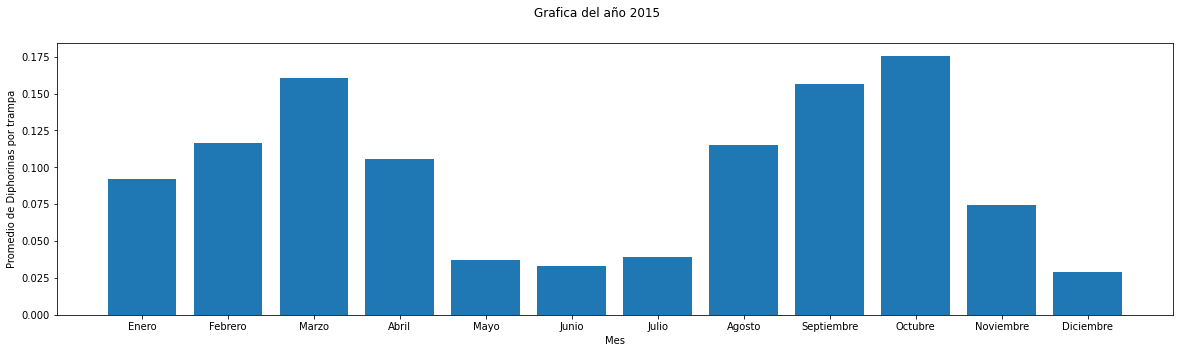

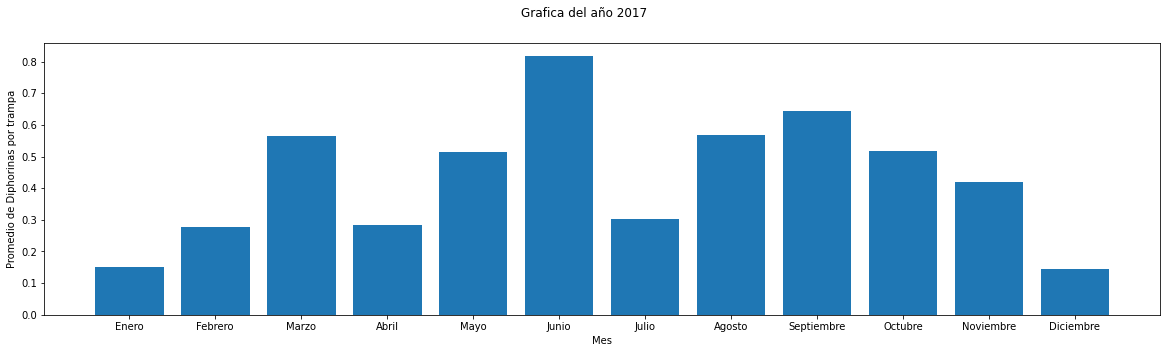

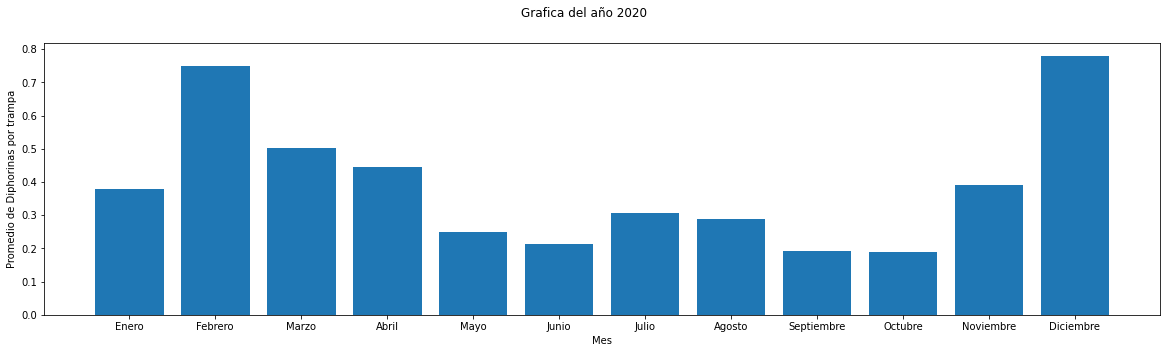

In [6]:
def promedio(x,year):
  r=x.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
  r.index=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
  fig, axes =plt.subplots(1,figsize=(20,5))
  plt.bar(r.index, r.values)
  year= 'Grafica del año ' + str(year)
  plt.xlabel('Mes')
  plt.ylabel('Promedio de Diphorinas por trampa')
  plt.suptitle(year)
  plt.show()
  print()

promedio(df['2015'],2015)
promedio(df['2017'],2017)

df['2020']=df['2020'].rename(columns={'DiaphorinaXTrampa':'No_DiaphorinasXtrampa'})
promedio(df['2020'],2020)

## Problema 2

Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo por un municipio 

Mes
1     0.575518
2     1.302721
3     0.707447
4     0.386850
5     0.320827
6     0.247656
7          NaN
8     0.434690
9     0.349813
10    0.332610
11    0.731200
12    1.585185
Name: No_DiaphorinasXtrampa, dtype: float64


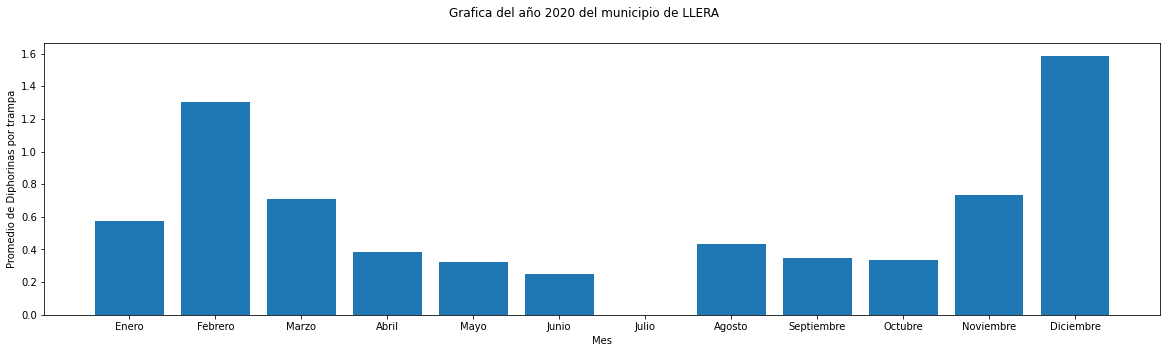

In [24]:
df1=df['2020'].set_index('Municipio').loc['LLERA']
print(df1.groupby(['Mes']).mean()['No_DiaphorinasXtrampa'])
promedio(df1,'2020 del municipio de LLERA' )